<a href="https://colab.research.google.com/github/affandhanbad-dev/Rainfall-Prediction-webapp/blob/main/rainfall_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn.datasets
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
import pickle

In [ ]:
rainfall_data = pd.read_csv('Rainfall.csv')

In [ ]:
rainfall_data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
rainfall_data.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [ ]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


/tmp/ipython-input-901115291.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rainfall_data['maxtemp'])


<Axes: xlabel='maxtemp', ylabel='Density'>

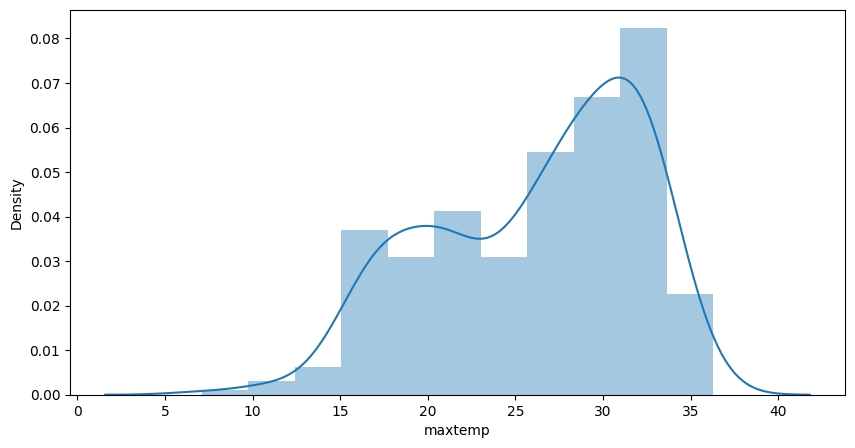

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(rainfall_data['maxtemp'])
# sns.heatmap(rainfall_data.corr(), annot=True)

In [ ]:
rainfall_data.shape

(366, 12)

/tmp/ipython-input-3325690485.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rainfall_data['mintemp'])


<Axes: xlabel='mintemp', ylabel='Density'>

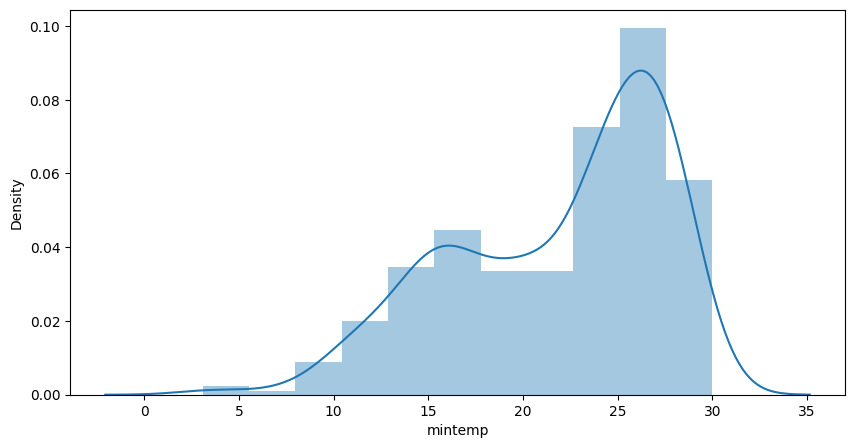

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(rainfall_data['mintemp'])

In [ ]:
rainfall_data.columns = rainfall_data.columns.str.strip()

In [ ]:
rainfall_data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
data = rainfall_data.drop(['day'], axis=1)
data.head()
data.tail()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [ ]:
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [ ]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [ ]:
data["windspeed"].unique()


array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [ ]:
data["windspeed"] = data["windspeed"].fillna(data["windspeed"].median())
data["winddirection"] = data["winddirection"].fillna(data["winddirection"].mode())
data["winddirection"].isnull().sum()

np.int64(1)

In [ ]:
# data.replace({"rainfall" :{"yes" : 0, "no": 1}},inplace = True)
data.replace({"rainfall":{"yes":1,"no":0}}, inplace=True)

data["rainfall"].value_counts()

/tmp/ipython-input-2560806683.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"rainfall":{"yes":1,"no":0}}, inplace=True)


,count
rainfall,
1,249
0,117


In [ ]:
data.groupby("rainfall").mean()


,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,
0,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
1,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.766129,22.595582


In [ ]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [ ]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

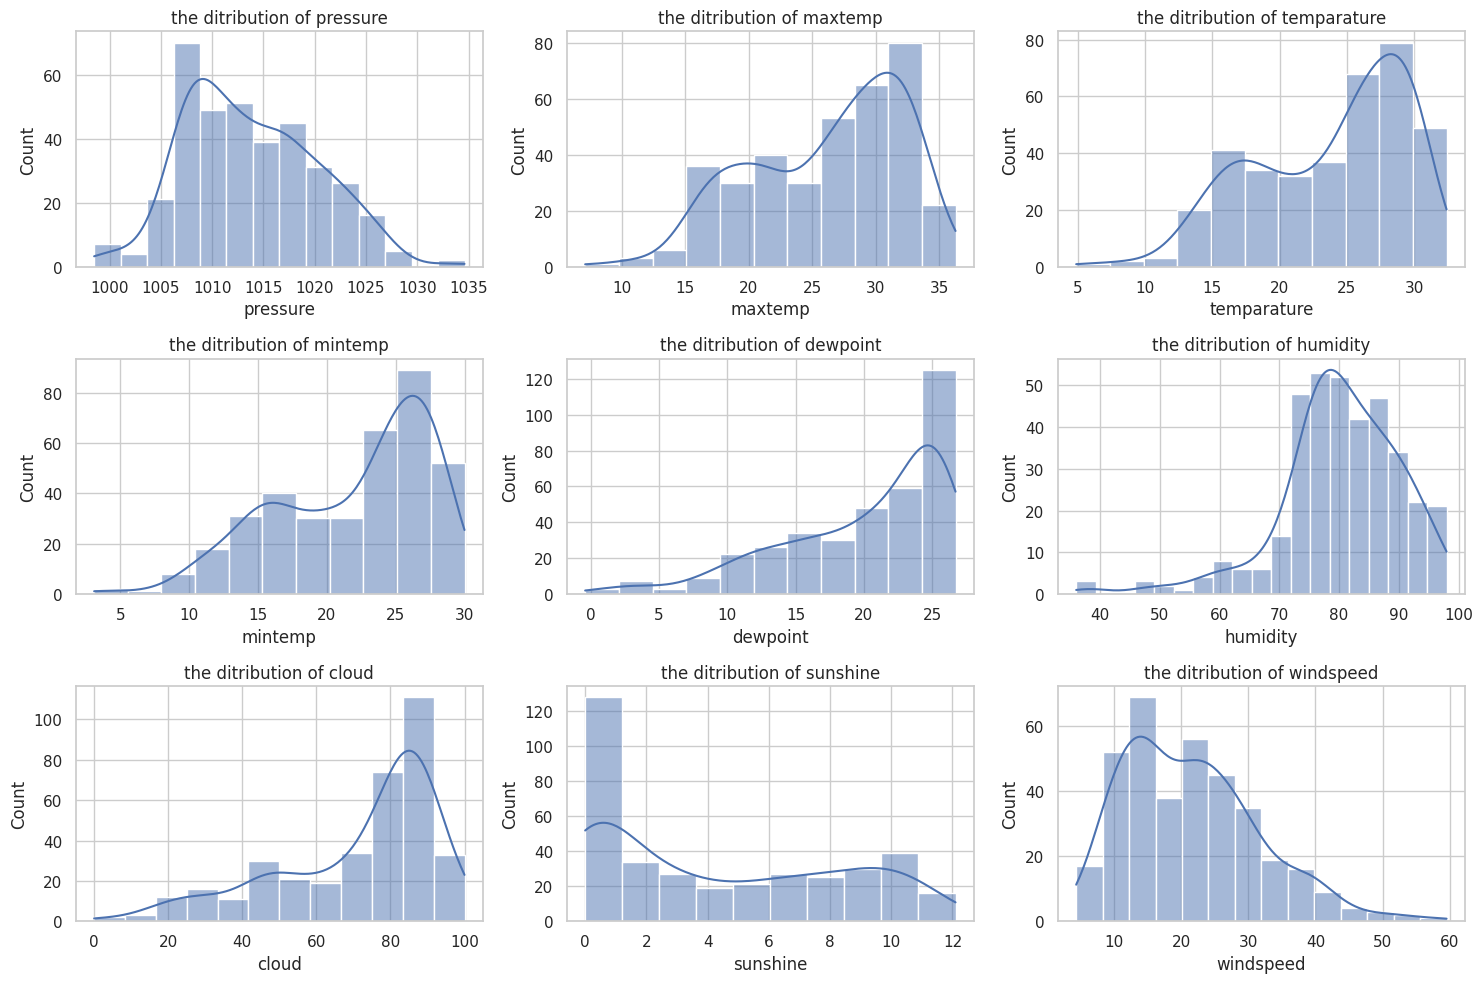

In [ ]:
sns.set(style = "whitegrid")
plt.figure(figsize=(15,10))
for i, column in enumerate (['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'windspeed'],1):
  plt.subplot(3,3,i)
  sns.histplot(data[column],kde=True)
  plt.title(f"the ditribution of {column}")
plt.tight_layout()
plt.show()

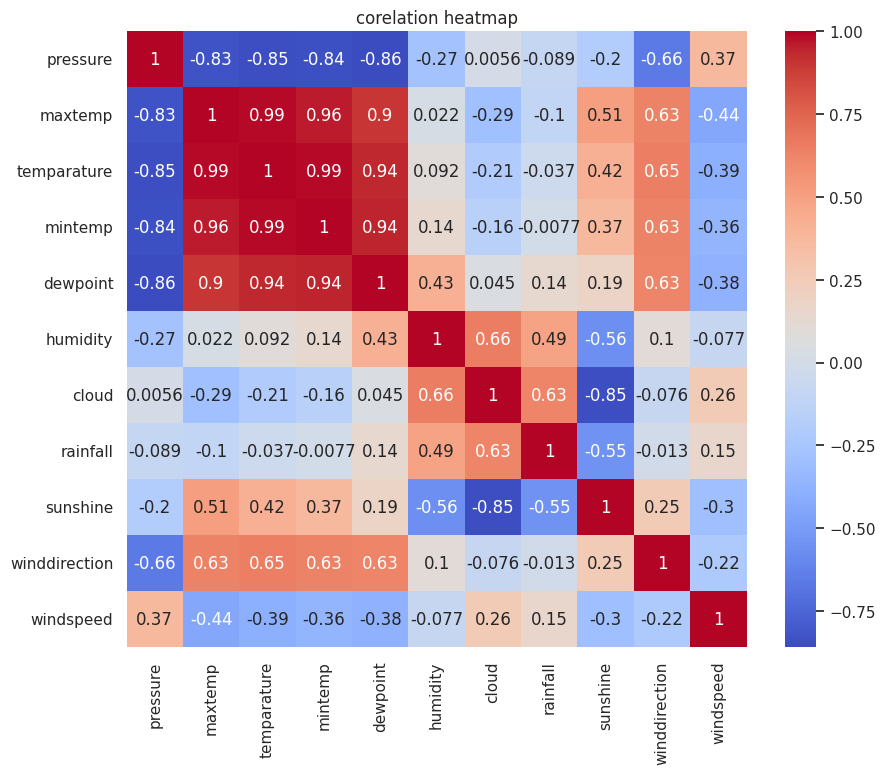

In [ ]:
plt.figure(figsize= (10,8))
sns.set(style = "whitegrid")
sns.heatmap(data.corr() ,annot = True ,cmap = "coolwarm")
plt.title("corelation heatmap")
plt.show()

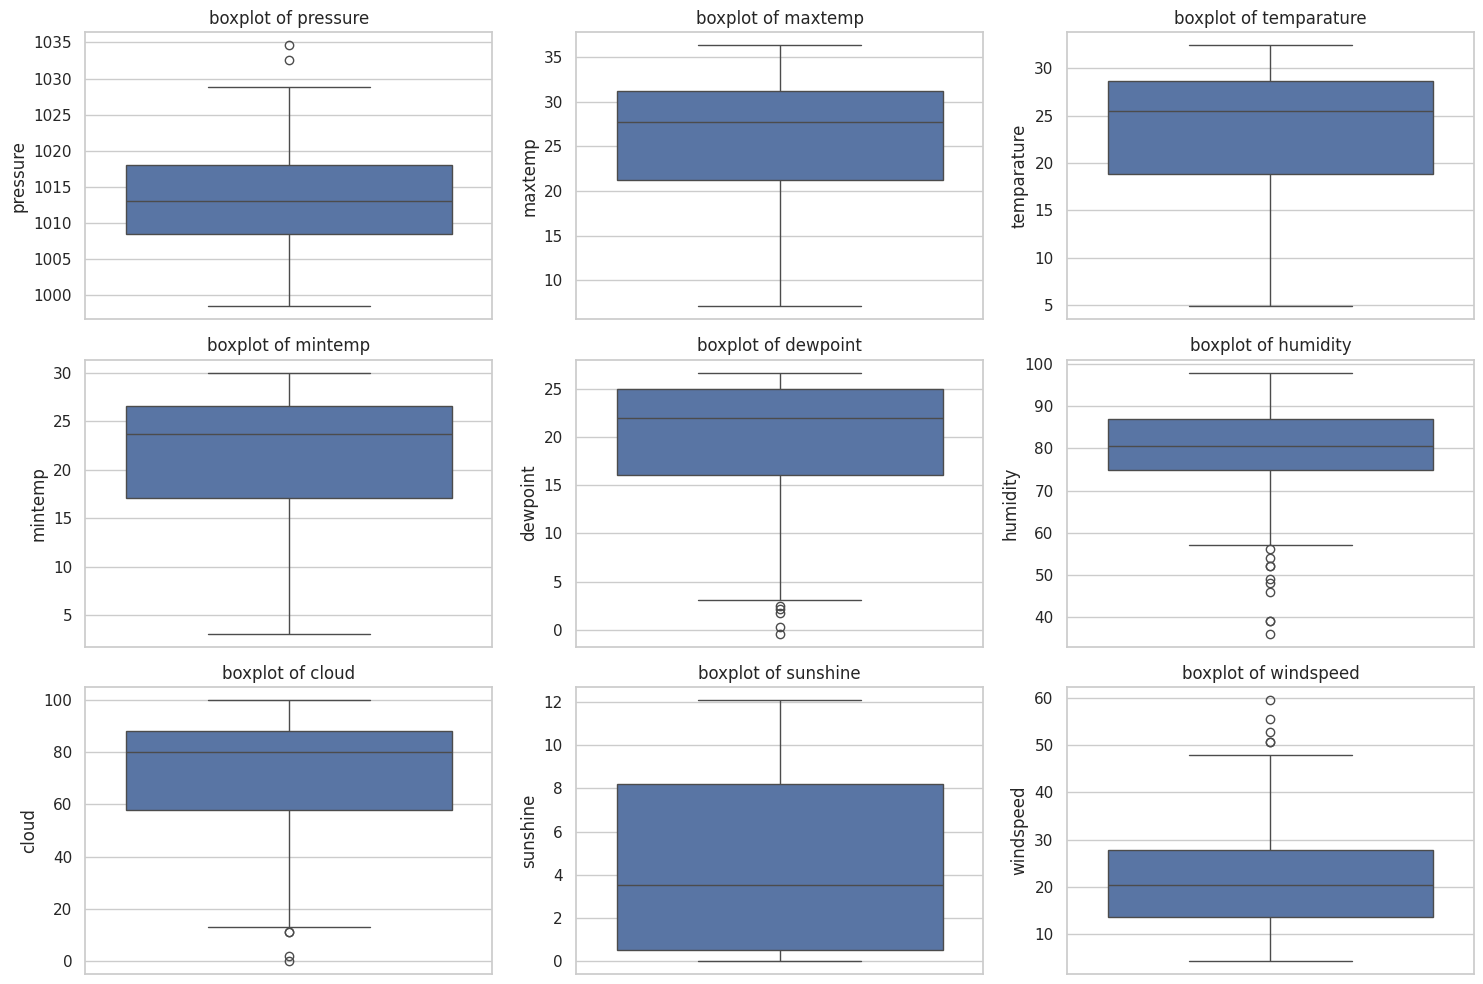

In [ ]:
sns.set(style = "whitegrid")
plt.figure(figsize=(15,10))
for i, column in enumerate (['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'windspeed'],1):
  plt.subplot(3,3,i)
  sns.boxplot(data[column])
  plt.title(f"boxplot of {column}")
plt.tight_layout()
plt.show()

In [ ]:
data = data.drop(columns = ['maxtemp', 'temparature', 'mintemp'])
# data.shape()

In [ ]:
data.shape

(366, 8)

In [ ]:
data["rainfall"].value_counts()

,count
rainfall,
1,249
0,117


In [ ]:
df_majority = data[data["rainfall"]==1]
df_minority = data[data["rainfall"]==0]

In [ ]:
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [ ]:
df_majority_downsampled.shape

(117, 8)

In [ ]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.shape

(234, 8)

In [ ]:
df_downsampled= df_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)

In [ ]:
df_downsampled["rainfall"].value_counts()
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [ ]:
df_downsampled.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'rainfall', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [ ]:
df_downsampled.isnull().sum()

,0
pressure,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,1
windspeed,0


In [ ]:
X = df_downsampled.drop(columns = "rainfall")
y = df_downsampled["rainfall"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

In [ ]:
# predictor = rf_model.predict(X_train)
# acuuracy = accuracy_score(y_train, predictor)
# print(acuuracy)

In [ ]:
# predictor = rf_model.predict(X_test)
# acuuracy = accuracy_score(y_test, predictor)
# print(acuuracy)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
grid_search.cv_results_
result = pd.DataFrame(grid_search.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002592,0.000620,0.000000,0.000000,None,auto,1,2,50,"{'max_depth': None, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,163
1,0.002059,0.000805,0.000000,0.000000,None,auto,1,2,100,"{'max_depth': None, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,163
2,0.001355,0.000137,0.000000,0.000000,None,auto,1,2,200,"{'max_depth': None, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,163
3,0.001245,0.000106,0.000000,0.000000,None,auto,1,5,50,"{'max_depth': None, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,163
4,0.001274,0.000215,0.000000,0.000000,None,auto,1,5,100,"{'max_depth': None, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.160606,0.011531,0.009219,0.000185,20,log2,4,5,100,"{'max_depth': 20, 'max_features': 'log2', 'min...",0.684211,0.815789,0.864865,0.810811,0.864865,0.808108,0.066120,63
239,0.305171,0.007298,0.015433,0.000477,20,log2,4,5,200,"{'max_depth': 20, 'max_features': 'log2', 'min...",0.684211,0.815789,0.837838,0.810811,0.918919,0.813514,0.075411,7
240,0.080976,0.006780,0.005895,0.000100,20,log2,4,10,50,"{'max_depth': 20, 'max_features': 'log2', 'min...",0.684211,0.815789,0.837838,0.810811,0.864865,0.802703,0.062251,119
241,0.157743,0.006511,0.009747,0.001271,20,log2,4,10,100,"{'max_depth': 20, 'max_features': 'log2', 'min...",0.657895,0.815789,0.864865,0.783784,0.918919,0.808250,0.087994,39


In [ ]:
best_rf_model = grid_search.best_estimator_
print(best_rf_model)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)


In [ ]:
cv_score = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.71052632 0.81578947 0.83783784 0.81081081 0.91891892]
0.8187766714082503


In [ ]:
predictor = best_rf_model.predict(X_train)
acuuracy = accuracy_score(y_train, predictor)
print(acuuracy)
cm = confusion_matrix(y_train, predictor)
print(cm)
cr = classification_report(y_train, predictor)
print(cr)

0.9358288770053476
[[88  5]
 [ 7 87]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        93
           1       0.95      0.93      0.94        94

    accuracy                           0.94       187
   macro avg       0.94      0.94      0.94       187
weighted avg       0.94      0.94      0.94       187



In [ ]:
predictor = best_rf_model.predict(X_test)
acuuracy = accuracy_score(y_test, predictor)
print(acuuracy)
cm = confusion_matrix(y_test, predictor)
print(cm)
cr = classification_report(y_test, predictor)
print(cr)

0.723404255319149
[[16  8]
 [ 5 18]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        24
           1       0.69      0.78      0.73        23

    accuracy                           0.72        47
   macro avg       0.73      0.72      0.72        47
weighted avg       0.73      0.72      0.72        47



In [ ]:
input = (1022.2,14.1,78	,90	,0,30.0,28.5 )
np_as_array = np.asarray(input)
input_reshaped = np_as_array.reshape(1,-1)
prediction = best_rf_model.predict(input_reshaped)
# print(prediction)
if (prediction[0] == 0):
  print('no rainfall')
else:
  print('rainfall')

rainfall


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
model_data = {'model' : best_rf_model,'feature_name' :X.columns.tolist() }
with open ("rainfall_trained_model.pkl", "wb") as file:
  pickle.dump(model_data, file)

In [ ]:
import pickle
import pandas as pd

In [ ]:
with open("rainfall_trained_model.pkl", "rb") as files:
  model_data = pickle.load(files)

In [ ]:
model = model_data["model"]
feature_name = model_data["feature_name"]

In [ ]:
input = (1022.2,14.1,78	,90	,0,30.0,28.5 )
np_as_array = np.asarray(input)
input_reshaped = np_as_array.reshape(1,-1)
prediction = model.predict(input_reshaped)
# print(prediction)
if (prediction[0] == 0):
  print('no rainfall')
else:
  print('rainfall')

rainfall


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
